# Laboratory 2 : Computer Vision

# Part 1: MNIST Digist Classification

In the first portion of this lab, we will build and train a convolutional neural network (CNN) for classification of handwritten digits from the famous [MNIST](http://yann.lecun.com/exdb/mnist/) dataset. Our classes are the digits 0-9.


In [0]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import tqdm
import random

## 1.1 MNIST Dataset 

We first download and load the dataset and display a few random samples from it.

In [0]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = np.expand_dims(train_images, axis=-1)/255.
test_images = np.expand_dims(test_images, axis=-1)/255.

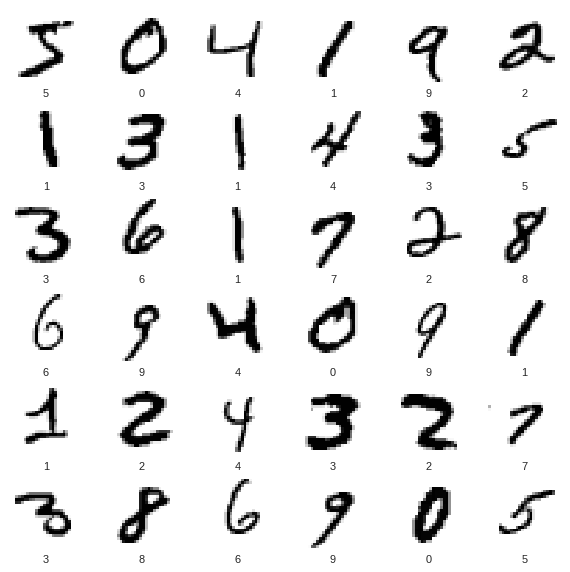

In [276]:
plt.figure(figsize=(10,10))
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(np.squeeze(train_images[i]), cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])

We define placeholders for our input data `x` and the corresponding labels `y`:

In [0]:
# placeholders for data (x) and labels (y)
# x = tf.placeholder(tf.float32, shape=[None, 784])
# y = tf.placeholder(tf.float32, shape=[None, 10])

## 1.2 CNN for Handwritten Digit Classification

We will build a CNN composed of two convolutional and pooling layers, followed by two fully connected layers, and ultimately output a probability distribution over the 10 digit classes (0-9). The CNN we will be building is depicted below.

![alt_text](img/mnist_model.png "CNN Architecture for MNIST Classification")

First, we must [reshape](https://www.tensorflow.org/api_docs/python/tf/reshape) our input from a 784-dimensional input to a 4-D blob that preserves the spatial nature of the image. 

In [0]:
# x_input = tf.reshape(x, [-1, 28, 28, 1])

Note how we assign the special value of -1 to the first component of the shape. This means that the size of that dimension is computed so that the total size (number of dimensions of the input, 784 in this case) remains constant.

### 1.2.1 CNN Architecture
Now we can start defining the architecture of our CNN using the [`tf.layers`](https://www.tensorflow.org/api_docs/python/tf/layers) API:

In [0]:
# # first convolutional layer
# # 32 5x5 filters with stride of 1, ReLU activation
# conv1 = tf.layers.conv2d(inputs=x_input, filters=32, kernel_size=[5,5], activation=tf.nn.relu)
# # first pooling layer
# # 2x2 max pooling with stride of 2
# pool1 = tf.layers.max_pooling2d(inputs=conv1, pool_size=[2,2], strides=[2,2])

In [0]:
# # second convolutional layer
# '''TODO: define a convolutional layer with 48 5x5 filters with stride of 1, ReLU activation'''
# conv2 = tf.layers.conv2d(inputs=pool1, filters=48, kernel_size=[5,5], activation=tf.nn.relu)
# # second pooling layer
# '''TODO: define a 2x2 max pooling layer with stride of 2'''
# pool2 = tf.layers.max_pooling2d(inputs=conv2, pool_size=[2,2], strides=[2,2])

In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=24, kernel_size=(3,3), strides=(2,2), input_shape=(28, 28, 1), activation=tf.nn.relu),
#     tf.keras.layers.Conv2D(filters=36, kernel_size=(3,3), strides=(2,2), activation=tf.nn.relu),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

We've used the [`tf.layers`](https://www.tensorflow.org/api_docs/python/tf/layers) API to build convolutional layers for feature extraction. Now, we can define fully connected layers to complete the handwritten digit classification task. 

Let's take a step back and consider the dimensionality of the output of the last max pooling operation. The number of nodes in a feature map after a convolution or pooling operation is given by:<br><br>
$$
n = \Big(\frac{(d-i+2p)}{s}+1\Big) \times \Big(\frac{(d-i+2p)}{s}+1\Big)
$$
<br><br>
where $d$ is the dimension of the input to that layer, $i$ is the dimension of the filter we apply, $p$ is the padding, and $s$ is the stride. In our case, $p=0$. For convolutional layers, $i=5, s=1$, and for pooling layers, $i=2, s=2$. It is a useful exercise to go through these calculations:

In [0]:
'''TODO: Determine the dimensionality of the feature maps after each convolution and max pooling operation'''
# Conv layer 1: 24x24 nodes per feature map, 32 feature maps
# Max pooling 1: 12x12 nodes per feature map, 32 feature maps
# Conv layer 2: 8x8 nodes per feature map, 48 feature maps
# Max pooling 2: 4x4 nodes per feature map, 48 feature maps
input_height = 28
conv1_height = (input_height - 5 + 2*0) + 1
pool1_height = conv1_height / 2
conv2_height = (pool1_height - 5 + 2*0) + 1 #TODO
pool2_height = conv2_height / 2 #TODO

We will [flatten](https://www.tensorflow.org/api_docs/python/tf/layers/flatten) the final feature maps before feeding as input into the first fully connected layer:

In [0]:
# flat = tf.layers.flatten(pool2)

The first fully connected layer will have 512 units and ReLU activation. We can then pass on its output as input to the final fully connected layer and output class probabilities:

In [0]:
# # pass flattened input into the first fully connected layer
# fc1 = tf.layers.dense(inputs=flat, units=512, activation=tf.nn.relu)
# # define second fully connected layer for 0-9 digit classification
# '''TODO: define the second fully connected layer. Think about the number of units you need.'''
# y_pred = tf.layers.dense(inputs=fc1, units=10) 

# # output probabilities of input image belonging to each digit class
# '''TODO: compute output probabilities for the predicted labels. What activation function should you use?'''
# probabilities = tf.nn.softmax(y_pred)

That defines our model! Now we can move on to defining the loss function we will optimize during training and the training itself.

The first layer in this network, `tf.keras.layers.Flatten`, transforms the format of the images from a 2d-array (of 28 by 28 pixels), to a 1d-array of 28 * 28 = 784 pixels. Think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn; it only reformats the data.

After the pixels are flattened, the network consists of a sequence of two `tf.keras.layers.Dense` layers. These are densely-connected, or fully-connected, neural layers. The first `Dense` layer has 128 nodes (or neurons). The second (and last) layer is a 10-node *softmax* layer—this returns an array of 10 probability scores that sum to 1. Each node contains a score that indicates the probability that the current image belongs to one of the 10 classes.

### Compile the model

Before the model is ready for training, it needs a few more settings. These are added during the model's *compile* step:

* *Loss function* —This measures how accurate the model is during training. We want to minimize this function to "steer" the model in the right direction.
* *Optimizer* —This is how the model is updated based on the data it sees and its loss function.
* *Metrics* —Used to monitor the training and testing steps. The following example uses *accuracy*, the fraction of the images that are correctly classified.

In [0]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Train the model

Training the neural network model requires the following steps:

1. Feed the training data to the model—in this example, the `train_images` and `train_labels` arrays.
2. The model learns to associate images and labels.
3. We ask the model to make predictions about a test set—in this example, the `test_images` array. We verify that the predictions match the labels from the `test_labels` array. 

To start training,  call the `model.fit` method—the model is "fit" to the training data:

In [326]:
model.fit(train_images, train_labels, epochs=2)

Epoch 1/2
60000/60000 [==============================] - 30s 498us/step - loss: 0.2094 - acc: 0.9368
Epoch 2/2
60000/60000 [==============================] - 29s 478us/step - loss: 0.0705 - acc: 0.9785


As the model trains, the loss and accuracy metrics are displayed. This model reaches an accuracy of about 0.88 (or 88%) on the training data.

## Evaluate accuracy

Next, compare how the model performs on the test dataset:

In [299]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 2s 198us/step
('Test accuracy:', 0.9869)


It turns out, the accuracy on the test dataset is a little less than the accuracy on the training dataset. This gap between training accuracy and test accuracy is an example of *overfitting*. Overfitting is when a machine learning model performs worse on new data than on their training data. 

## Make predictions

With the model trained, we can use it to make predictions about some images.

In [0]:
predictions = model.predict(test_images)

Here, the model has predicted the label for each image in the testing set. Let's take a look at the first prediction:

In [301]:
predictions[0]

array([3.6077488e-11, 6.5054745e-10, 3.7874459e-09, 9.1225195e-07,
       4.3704563e-12, 3.1701447e-11, 1.5999779e-13, 9.9998939e-01,
       2.9842266e-08, 9.6171379e-06], dtype=float32)

A prediction is an array of 10 numbers. These describe the "confidence" of the model that the image corresponds to each of the 10 different digits. We can see which label has the highest confidence value:

In [302]:
np.argmax(predictions[0])

7

So the model is most confident that this image is a "7". And we can check the test label to see this is correct:

In [303]:
test_labels[0]

7

We can graph this to look at the full set of 10 channels

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(np.squeeze(img), cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

Let's look at the 0th image, predictions, and prediction array. 

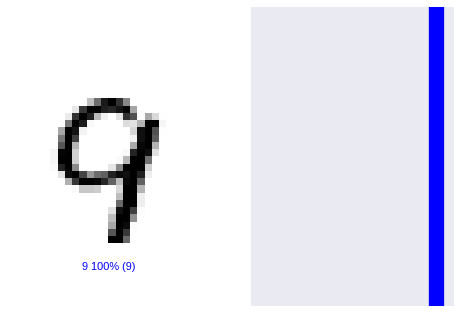

In [330]:
#@title Try changing the sldier to find when the model fails! { run: "auto" }

image_index = 16 #@param {type:"slider", min:0, max:100, step:1}
plt.subplot(1,2,1)
plot_image(image_index, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(image_index, predictions,  test_labels)

Let's plot several images with their predictions. Correct prediction labels are blue and incorrect prediction labels are red. The number gives the percent (out of 100) for the predicted label. Note that it can be wrong even when very confident. 

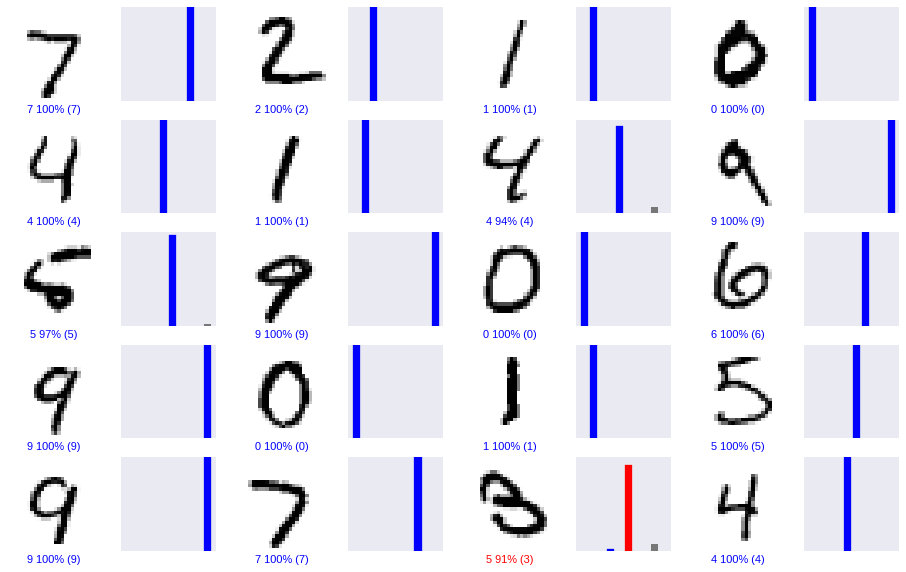

In [333]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)


And, as before, the model predicts a label of 9.

### 1.2.2 Loss Function and Class Prediction

We can use mean cross entropy as our loss function as this is a multi-class classification problem:

In [0]:
# calculate mean cross entropy over entire batch of samples. 
'''TODO: write a TensorFlow expression for computing the mean cross entropy loss over the entire batch of samples.
Hint: consider tf.nn.softmax_cross_entropy_with_logits_v2 and pay close attention to the logits input!'''
# cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y, logits=y_pred))

Next, we specify the optimizer (Adam) and the learning rate (`1e-3`). We also calculate the average accuracy.

In [0]:
# optimizer = tf.train.AdamOptimizer(1e-3).minimize(cross_entropy)
# correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.argmax(y, 1))
# accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

Finally, we obtain the predicted class:

In [0]:
# prediction=tf.argmax(y_pred,1)

**Tensorboard** is a tool to automatically plot and visualize the training process. You can periodically send "summaries" such as: 
* scalars (loss, accuracy, ...)
* images (photos, heatmaps, ...)
* distributions (weights, biases, activations, ...)

Let's set some simple scalar summaries to be plotted on Tensorboard (http://localhost:6006) - the plotting code below occurs during training.

In [0]:
tf.summary.scalar('loss',cross_entropy) 
tf.summary.scalar('acc',accuracy)

merged_summary_op = tf.summary.merge_all() #combine into a single summary which we can run on Tensorboard

### 1.2.3 Training!

Now that we have defined our network architecture and optimization criteria, we are ready to train and evaluate our CNN on the MNIST dataset! 

For this, we create an instance of `tf.Session()`, and initialize variables within the session. We set the number of iterations for optimization to 200. Additionally, we will plot the evolution of performance (accuracy) over the course of training and the final [confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix).

In [0]:
import uuid
num_iterations = 200
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    uniq_id = "./logs/lab2part1_"+uuid.uuid1().__str__()[:6]
    summary_writer = tf.summary.FileWriter(uniq_id, graph=tf.get_default_graph())
    training_perf = []
    for i in tqdm.tqdm(range(num_iterations)):
        batch = mnist.train.next_batch(50)

        feed_dict = {x: batch[0], y: batch[1]}
        (_, train_accuracy, summary) = sess.run([optimizer,accuracy, merged_summary_op], feed_dict=feed_dict)
        training_perf.append(train_accuracy)
        summary_writer.add_summary(summary, i) 

    # now plotting the variation of training performance
    plt.plot(range(num_iterations), training_perf)
    plt.show()
    
    # we now evaluate the validation accuracy
    print('Validation accuracy: %g' % accuracy.eval(feed_dict={x: mnist.test.images, y: mnist.test.labels}))
    
    # we now plot the confusion matrix on the validation accuracy
    preds = prediction.eval(feed_dict={x: mnist.test.images})
    conf_mat = tf.contrib.metrics.confusion_matrix(labels=tf.argmax(mnist.test.labels,1), predictions=preds, num_classes=10)
    plt.imshow(conf_mat.eval())

In [0]:
!tensorboard --logdir=./logs

The code above trains the model and print the accuracy on the test set at the end of optimization. This network should produce an accuracy of ~95%. To increase this value, you can try applying some of the techniques you learned in Lecture 1, such as:

- Using dropout in the first fully connected layer (hint: use `tf.nn.dropout` and select a good value of the dropout ratio).
- Adding extra layers to the network, and tuning the hyperparameters of the network architecture (i.e., number and dimension of filters).
- Decreasing the learning rate as training progresses.